In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import glob
import PIL
from PIL import Image
import os
%matplotlib inline

In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7526235597326139000
]


In [32]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
1.15.0


### Loading Data

In [33]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\shara\Downloads\Artificial Intelligence\Final Project\dataset\train',
        target_size=(224, 224),
        batch_size=186,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\shara\Downloads\Artificial Intelligence\Final Project\dataset\test',
        target_size=(224, 224),
        batch_size = 92,
        class_mode='categorical')

Found 186 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [34]:
# X = training_set.image_data_generator
# y = training_set.labels

### Creating array of Training Data and Labels 

In [35]:
batch_size=186
total_images = training_set.n
steps = total_images//batch_size 
#iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

for i in range(steps):
    a , b = training_set.next()

In [36]:
training_set.batch_size

186

In [37]:
X_train = a.flatten().reshape(186,150528)
X_train

array([[0.5764706 , 0.5764706 , 0.5764706 , ..., 0.2392157 , 0.2392157 ,
        0.2392157 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34509805, 0.34509805, 0.34509805, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.        , 0.        , 0.        , ..., 0.8078432 , 0.8078432 ,
        0.8078432 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10980393, 0.10980393, 0.10980393, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [38]:
x = b.ravel()
index = 0
y_train=[]
for i in x:
    if(index%2==0):
        y_train.append(int(i))
    index+=1

### Creating array of Testing data and Labels

In [39]:
total_images = test_set.n
steps = total_images//92 
#iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

for i in range(steps):
    a , b = test_set.next()

In [40]:
X_test = a.flatten().reshape(92,150528)
X_test

array([[0.06666667, 0.06666667, 0.06666667, ..., 0.09411766, 0.09411766,
        0.09411766],
       [0.49411768, 0.49411768, 0.49411768, ..., 0.5254902 , 0.5254902 ,
        0.5254902 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07450981, 0.07450981, 0.07450981, ..., 0.57254905, 0.57254905,
        0.57254905]], dtype=float32)

In [41]:
x = b.ravel()
index = 0
y_test=[]
for i in x:
    if(index%2==0):
        y_test.append(int(i))
    index+=1

In [42]:
len(y_test)

92

### 1.Gaussian Naive Bayes

In [223]:
gnb = GaussianNB()

In [224]:
gnb.fit(X_train,y_train)

GaussianNB()

#### Training accuracy

In [225]:
gnb.score(X_train,y_train)

0.946236559139785

#### Testing accuracy

In [226]:
gnb.score(X_test,y_test)

0.967391304347826

In [227]:
y_pred = gnb.predict(X_test)

#### Classification Report

In [228]:
target_names=['covid','non-covid(normal)']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

            covid       0.97      0.99      0.98        68
non-covid(normal)       0.96      0.92      0.94        24

         accuracy                           0.97        92
        macro avg       0.96      0.95      0.96        92
     weighted avg       0.97      0.97      0.97        92



#### Confusion Matrix

In [229]:
confusion_matrix(y_test,y_pred)

array([[67,  1],
       [ 2, 22]], dtype=int64)

### 2.Support Vector Classifier

In [230]:
svc = SVC()

In [231]:
svc.fit(X_train,y_train)

SVC()

#### Training accuracy

In [232]:
svc.score(X_train,y_train)

0.9946236559139785

#### Testing accuracy

In [233]:
svc.score(X_test,y_test)

0.9782608695652174

In [237]:
y_pred = svc.predict(X_test)

#### Classification Report

In [238]:
target_names=['covid','non-covid(normal)']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

            covid       0.97      1.00      0.99        68
non-covid(normal)       1.00      0.92      0.96        24

         accuracy                           0.98        92
        macro avg       0.99      0.96      0.97        92
     weighted avg       0.98      0.98      0.98        92



#### Confusion Matrix

In [239]:
confusion_matrix(y_test,y_pred)

array([[68,  0],
       [ 2, 22]], dtype=int64)

#### Loading Data for Keras

In [113]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\shara\Downloads\Artificial Intelligence\Final Project\dataset\train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\shara\Downloads\Artificial Intelligence\Final Project\dataset\test',
        target_size=(224, 224),
        batch_size = 64,
        class_mode='categorical')

Found 186 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


## 3.Logistic Regression

In [47]:
model = Sequential()
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [48]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/20
6/6 [==============================] - 18s 3s/step - loss: 85.2353 - acc: 0.5540 - val_loss: 174.6905 - val_acc: 0.2609
Epoch 2/20
6/6 [==============================] - 17s 3s/step - loss: 35.3791 - acc: 0.6980 - val_loss: 37.0018 - val_acc: 0.7391
Epoch 3/20
6/6 [==============================] - 17s 3s/step - loss: 46.5291 - acc: 0.5711 - val_loss: 4.0178 - val_acc: 0.9565
Epoch 4/20
6/6 [==============================] - 16s 3s/step - loss: 4.0993 - acc: 0.8748 - val_loss: 0.4898 - val_acc: 0.9674
Epoch 5/20
6/6 [==============================] - 16s 3s/step - loss: 3.6055 - acc: 0.9403 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 6/20
6/6 [==============================] - 16s 3s/step - loss: 2.4763 - acc: 0.9275 - val_loss: 0.2609 - val_acc: 0.9783
Epoch 7/20
6/6 [==============================] - 16s 3s/step - loss: 2.4896 - acc: 0.9366 - val_loss: 0.8196 - val_acc: 0.9674
Epoch 8/20
6/6 [==============================] - 15s 3s/step - loss: 3.8056 - acc: 0.9315 - val_l

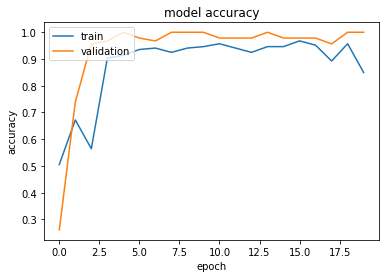

In [49]:
model = model.fit(training_set,validation_data=test_set,epochs=20)
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4.Vanilla CNN

In [50]:
input_shape = (224,224,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [51]:
sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/20
6/6 [==============================] - 18s 3s/step - loss: 1896835.0840 - acc: 0.4516 - val_loss: 209696336.0000 - val_acc: 0.2609
Epoch 2/20
6/6 [==============================] - 16s 3s/step - loss: 54130153451385.2891 - acc: 0.5269 - val_loss: 5021650797985792.0000 - val_acc: 0.2609
Epoch 3/20
6/6 [==============================] - 17s 3s/step - loss: 2129421266460985524224.0000 - acc: 0.5161 - val_loss: 19129659225154898624512.0000 - val_acc: 0.7391
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 56761008332860043619981066240.0000 - acc: 0.4731 - val_loss: 2410623547311646207491107192832.0000 - val_acc: 0.7391
Epoch 5/20
6/6 [==============================] - 16s 3s/step - loss: inf - acc: 0.4839 - val_loss: nan - val_acc: 0.3152
Epoch 6/20
6/6 [==============================] - 16s 3s/step - loss: nan - acc: 0.4839 - val_loss: nan - val_acc: 0.2609
Epoch 7/20
6/6 [==============================] - 17s 3s/step - loss: nan - acc: 0.4839 - val_loss: n

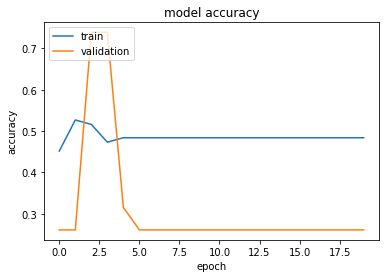

In [52]:
model = model.fit(training_set,validation_data=test_set,epochs=20)
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5.CNN with Batch Normalization and Dropout

In [114]:
input_shape = (224,224,3)

In [115]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [116]:
sgd = SGD(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
6/6 [==============================] - 81s 14s/step - loss: 44.8164 - acc: 0.8226 - val_loss: 12.6969 - val_acc: 0.4674
Epoch 2/10
6/6 [==============================] - 85s 14s/step - loss: 6.3559 - acc: 0.9516 - val_loss: 22.6090 - val_acc: 0.6522
Epoch 3/10
6/6 [==============================] - 82s 14s/step - loss: 8.5608 - acc: 0.9731 - val_loss: 16.3677 - val_acc: 0.7500
Epoch 4/10
6/6 [==============================] - 82s 14s/step - loss: 5.0988 - acc: 0.9785 - val_loss: 7.9775 - val_acc: 0.8152
Epoch 5/10
6/6 [==============================] - 80s 13s/step - loss: 1.2385 - acc: 0.9839 - val_loss: 3.9523 - val_acc: 0.9130
Epoch 6/10
6/6 [==============================] - 81s 14s/step - loss: 0.9820 - acc: 0.9892 - val_loss: 1.9346 - val_acc: 0.9457
Epoch 7/10
6/6 [==============================] - 80s 13s/step - loss: 0.4098 - acc: 0.9946 - val_loss: 8.4076 - val_acc: 0.9130
Epoch 8/10
6/6 [==============================] - 80s 13s/step - loss: 0.1499 - acc: 0.9946 -

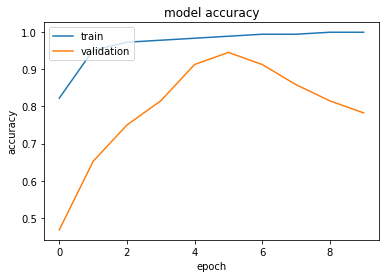

In [118]:
model = model.fit(training_set,validation_data=test_set,epochs=10)
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 6. VGG16

In [75]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\shara\Downloads\Artificial Intelligence\Final Project\dataset\train',
        target_size=(224, 224),
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\shara\Downloads\Artificial Intelligence\Final Project\dataset\test',
        target_size=(224, 224),
        class_mode='categorical')

Found 186 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [106]:
from keras.applications import VGG16
new_input = (224, 224, 3)
pretrained_model = VGG16(include_top=False, input_shape = new_input)
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [107]:
from keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(training_set)
vgg_features_val = pretrained_model.predict(test_set)

In [108]:
train_target = to_categorical(training_set.labels)
val_target = to_categorical(test_set.labels)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_71 (Dense)             (None, 2)                 50178     
Total params: 50,178
Trainable params: 50,178
Non-trainable params: 0
_________________________________________________________________
Train on 186 samples, validate on 92 samples
Epoch 1/50
186/186 [==============================] - 1s 5ms/sample - loss: 1.6589 - acc: 0.4785 - val_loss: 1.9921 - val_acc: 0.2609
Epoch 2/50
186/186 [==============================] - 0s 268us/sample - loss: 1.1175 - acc: 0.5430 - val_loss: 0.8522 - val_acc: 0.3370
Epoch 3/50
186/186 [==============================] - 0s 311us/sample - loss: 0.7580 - acc: 0.5430 - val_loss: 0.6840 - val_acc: 0.7283
Epoch 4/50
186/186 [==============================] - 0s 306

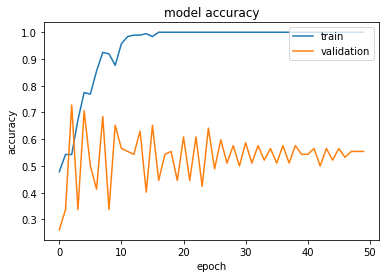

In [111]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

his = model2.fit(vgg_features_train, train_target, epochs=50, validation_data=(vgg_features_val, val_target))
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()